In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
url='https://drive.google.com/file/d/13d9fW8ZUey3O6QpgvQ2uL6VOSJq3KUQh/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df_s=df.Mortality
df.drop(['Mortality'],axis=1,inplace=True)
df['Mortality']=df_s
df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Follow.Up,Mortality
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,60,0
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,15,0
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,6,0
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,52,0
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,60,0
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,36,0
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,32,0
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,32,0


**Pre processing**

In [11]:
for j in df.columns:
    if df[f'{j}'].dtypes=='O':
        dit9={}
        x=0
        for i in df[f'{j}']:
            if i not in dit9:
                dit9[i]=x
                x+=1
        df[f'{j}']=df[f'{j}'].map(dit9)
df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Follow.Up,Mortality
0,45,0,0,0,0,0,0,0,0,0,...,3.0,2,0,7,2,1,0,0,60,0
1,51,1,0,1,0,0,0,0,0,0,...,1.2,2,0,7,2,1,0,0,15,0
2,55,1,0,0,0,1,1,0,0,0,...,3.4,2,0,3,2,1,0,0,6,0
3,55,1,0,0,0,1,1,0,0,0,...,2.0,2,1,7,3,1,0,0,52,0
4,56,1,0,0,0,1,0,0,0,0,...,4.0,3,2,7,3,1,0,0,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,1,1,1,0,0,0,0,0,1,...,0.5,2,0,7,3,0,4,1,60,0
364,55,1,1,0,0,1,0,0,0,0,...,2.0,2,3,7,3,1,6,1,36,0
365,58,1,1,1,0,0,0,0,0,0,...,0.8,1,3,3,1,1,1,1,32,0
366,58,1,1,1,0,0,0,0,0,0,...,2.6,2,0,7,4,1,1,1,32,0


In [12]:
df_r=df
df[f'{df.columns[-1]}'].value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
X1= df_r.iloc[:,:-1]
y1=df_r.iloc[:,-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=50)

In [14]:
df1=pd.concat([X1_train,y1_train],axis=1)
p=df1[f'{df1.columns[-1]}'].value_counts()
p

0    230
1     64
Name: Mortality, dtype: int64

In [15]:
#Over-sampling
from sklearn.utils import resample
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=max(p), 
                                 random_state=123) 
df_up = pd.concat([df_majority, df_minority_upsampled])
df_up[f'{df.columns[-1]}'].value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [16]:
df_majority = df1[df1[f'{df1.columns[-1]}']==0]
df_minority = df1[df1[f'{df1.columns[-1]}']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=min(p),
                                 random_state=123) 
df_down = pd.concat([df_majority_downsampled, df_minority])
df_down[f'{df.columns[-1]}'].value_counts()

0    64
1    64
Name: Mortality, dtype: int64

In [17]:
X2_train= df_up.iloc[:,:-1]
y2_train=df_up.iloc[:,-1]
X3_train= df_down.iloc[:,:-1]
y3_train=df_down.iloc[:,-1]
X3_train

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Follow.Up
228,54,1,1,1,0,1,1,0,0,0,...,1,2.8,2,1,7,3,1,2,1,15
316,54,1,1,1,0,1,0,0,0,0,...,0,1.4,2,1,7,2,1,3,1,32
189,24,3,1,1,0,1,1,0,0,0,...,1,1.6,2,0,7,1,1,1,1,5
49,58,1,1,1,0,0,0,0,0,0,...,0,0.8,1,3,3,1,1,1,1,32
175,60,1,0,0,0,1,0,0,0,0,...,0,2.6,2,2,7,3,1,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,50,0,1,1,0,0,0,0,0,1,...,0,1.2,2,0,7,1,1,1,1,52
147,45,0,1,1,0,0,0,0,0,0,...,1,2.5,2,0,7,3,1,4,1,52
299,63,2,0,0,0,1,1,1,0,0,...,0,4.0,2,3,7,4,1,0,0,8
348,45,0,1,1,0,1,0,0,0,0,...,1,1.8,2,0,6,2,1,1,1,7


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X4_train, y4_train = sm.fit_resample(X1_train, y1_train)


from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X5_train, y5_train = nt.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import NearMiss
nr = NearMiss()
X6_train, y6_train= nr.fit_resample(X1_train, y1_train)

from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X9_train, y9_train = nt.fit_resample(X4_train, y4_train)

In [19]:
from imblearn.under_sampling import TomekLinks
nt = TomekLinks()
X7_train, y7_train = nt.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X8_train, y8_train= nr.fit_resample(X2_train, y2_train)


from imblearn.under_sampling import NearMiss
nr = NearMiss()
X10_train, y10_train= nr.fit_resample(X4_train, y4_train)

In [20]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []

**Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier()
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()
clf10 = DecisionTreeClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [22]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf2 = GaussianNB()
clf3 = GaussianNB()
clf4 = GaussianNB()
clf5 = GaussianNB()
clf6 = GaussianNB()
clf7 = GaussianNB()
clf8 = GaussianNB()
clf9 = GaussianNB()
clf10 = GaussianNB()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [24]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**K-Nearest Neighbor (KNN)**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf2 = KNeighborsClassifier()
clf3 = KNeighborsClassifier()
clf4 = KNeighborsClassifier()
clf5 = KNeighborsClassifier()
clf6 = KNeighborsClassifier()
clf7 = KNeighborsClassifier()
clf8 = KNeighborsClassifier()
clf9 = KNeighborsClassifier()
clf10 = KNeighborsClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [26]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**AdaBoost Classifier**

In [27]:
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = AdaBoostClassifier()
clf3 = AdaBoostClassifier()
clf4 = AdaBoostClassifier()
clf5 = AdaBoostClassifier()
clf6 = AdaBoostClassifier()
clf7 = AdaBoostClassifier()
clf8 = AdaBoostClassifier()
clf9 = AdaBoostClassifier()
clf10 = AdaBoostClassifier()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

In [28]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()
clf4 = LogisticRegression()
clf5 = LogisticRegression()
clf6 = LogisticRegression()
clf7 = LogisticRegression()
clf8 = LogisticRegression()
clf9 = LogisticRegression()
clf10 = LogisticRegression()
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)
clf3.fit(X3_train,y3_train)
clf4.fit(X4_train,y4_train)
clf5.fit(X5_train,y5_train)
clf6.fit(X6_train,y6_train)
clf7.fit(X7_train,y7_train)
clf8.fit(X8_train,y8_train)
clf9.fit(X9_train,y9_train)
clf10.fit(X10_train,y10_train)
y1_pred1 = clf1.predict(X1_test)
y2_pred1 = clf2.predict(X1_test)
y3_pred1 = clf3.predict(X1_test)
y4_pred1 = clf4.predict(X1_test)
y5_pred1 = clf5.predict(X1_test)
y6_pred1 = clf6.predict(X1_test)
y7_pred1 = clf7.predict(X1_test)
y8_pred1 = clf8.predict(X1_test)
y9_pred1 = clf9.predict(X1_test)
y10_pred1 = clf10.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
A += [metrics.accuracy_score(y1_test, y1_pred1),metrics.f1_score(y1_test, y1_pred1,average='macro'),metrics.f1_score(y1_test, y1_pred1,average='micro')]
B += [metrics.accuracy_score(y1_test, y2_pred1),metrics.f1_score(y1_test, y2_pred1,average='macro'),metrics.f1_score(y1_test, y2_pred1,average='micro')]
C += [metrics.accuracy_score(y1_test, y3_pred1),metrics.f1_score(y1_test, y3_pred1,average='macro'),metrics.f1_score(y1_test, y3_pred1,average='micro')]
D += [metrics.accuracy_score(y1_test, y4_pred1),metrics.f1_score(y1_test, y4_pred1,average='macro'),metrics.f1_score(y1_test, y4_pred1,average='micro')]
E += [metrics.accuracy_score(y1_test, y5_pred1),metrics.f1_score(y1_test, y5_pred1,average='macro'),metrics.f1_score(y1_test, y5_pred1,average='micro')]
F += [metrics.accuracy_score(y1_test, y6_pred1),metrics.f1_score(y1_test, y6_pred1,average='macro'),metrics.f1_score(y1_test, y6_pred1,average='micro')]
G += [metrics.accuracy_score(y1_test, y7_pred1),metrics.f1_score(y1_test, y7_pred1,average='macro'),metrics.f1_score(y1_test, y7_pred1,average='micro')]
H += [metrics.accuracy_score(y1_test, y8_pred1),metrics.f1_score(y1_test, y8_pred1,average='macro'),metrics.f1_score(y1_test, y8_pred1,average='micro')]
I += [metrics.accuracy_score(y1_test, y9_pred1),metrics.f1_score(y1_test, y9_pred1,average='macro'),metrics.f1_score(y1_test, y9_pred1,average='micro')]
J += [metrics.accuracy_score(y1_test, y10_pred1),metrics.f1_score(y1_test, y10_pred1,average='macro'),metrics.f1_score(y1_test, y10_pred1,average='micro')]

**Graph**

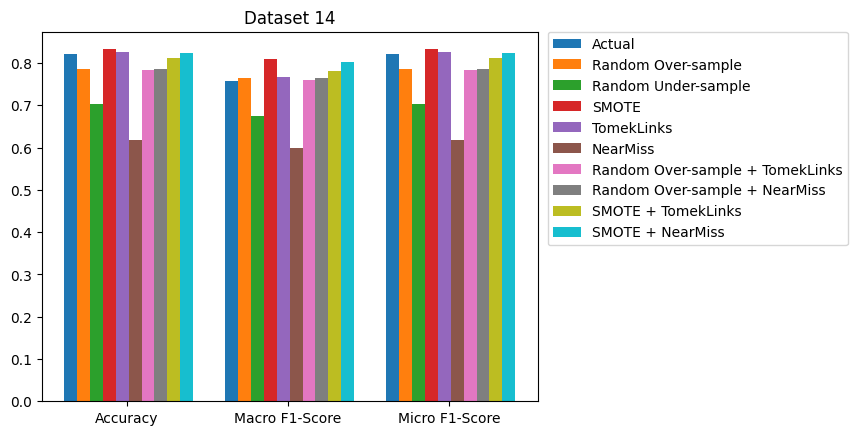

In [31]:
A1 = []
B1 = []
C1 = []
D1 = []
E1 = []
F1 = []
G1 = []
H1 = []
I1 = []
J1 = []
X = ['Accuracy','Macro F1-Score','Micro F1-Score']
X_axis = np.arange(len(X))
for i in range(3):
    k=0
    for j in range(i,len(A),3):
        k+=(A[j]/5)
    A1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(B),3):
        k+=(B[j]/5)
    B1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(C),3):
        k+=(C[j]/5)
    C1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(D),3):
        k+=(D[j]/5)
    D1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(E),3):
        k+=(E[j]/5)
    E1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(F),3):
        k+=(F[j]/5)
    F1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(G),3):
        k+=(G[j]/5)
    G1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(H),3):
        k+=(H[j]/5)
    H1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(I),3):
        k+=(I[j]/5)
    I1+=[k]
for i in range(3):
    k=0
    for j in range(i,len(J),3):
        k+=(J[j]/5)
    J1+=[k]
     
plt.bar(X_axis, A1, 0.08, label = 'Actual')
plt.bar(X_axis+0.08 , B1, 0.08, label = 'Random Over-sample')
plt.bar(X_axis + 0.16, C1, 0.08, label = 'Random Under-sample')
plt.bar(X_axis + 0.24, D1, 0.08, label = 'SMOTE')
plt.bar(X_axis+0.32, E1, 0.08, label = 'TomekLinks')
plt.bar(X_axis+0.40 , F1, 0.08, label = 'NearMiss')
plt.bar(X_axis + 0.48, G1, 0.08, label = 'Random Over-sample + TomekLinks')
plt.bar(X_axis + 0.56, H1, 0.08, label = 'Random Over-sample + NearMiss')
plt.bar(X_axis + 0.64, I1, 0.08, label = 'SMOTE + TomekLinks')
plt.bar(X_axis + 0.72, J1, 0.08, label = 'SMOTE + NearMiss')

plt.xticks(X_axis+0.35, X)
plt.title("Dataset 14")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()